### **Resturant Rating Prediction Case Study**

**Scenario:**
- Zomato, the online food app has several resturant with them and they want to predict how good or bad a resturant will turn out in the future. So they can take furthur action using that data.
- Data shared has **9551** resturants all over the world which are present in the Zomato App. It contains the details about the restaurants and what rating it achieved finally.

**Objective:** Creating a ML model to predict the Rating of resturant based on its characterstics, using supervised ML regression problem.

## Flow of case study:

The flow of the case study is as below:

- Reading the data in python
- Defining the problem statement
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Feature Engineering
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
!pip install chardet


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import chardet

# with open('../Datasets/ZomatoData.csv', 'rb') as f:
#     result = chardet.detect(f.read(100000))
#     print(result)

# # Use the detected encoding
# ZomatoData = pd.read_csv('../Datasets/ZomatoData.csv', encoding=result['encoding'])

# ZomatoData.head()

In [4]:
ZomatoData=pd.read_csv('../Datasets/ZomatoData.csv', encoding='ISO-8859-1')
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [5]:
# Printing data before deleting duplicates
print('Shape before deleting duplicates values:', ZomatoData.shape)

# Removing duplicate data if any
ZomatoData=ZomatoData.drop_duplicates()
print('Shape after deleting duplicates values:', ZomatoData.shape)

# Printing data
ZomatoData.head()

Shape before deleting duplicates values: (9551, 19)
Shape after deleting duplicates values: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [6]:
ZomatoData.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')

### **Defining the problem statement**

**Create a Predictive model which can predict the future Rating of a restaurant**


- **Target Variable:** Rating
- **Predictors:** location, menu, cost etc.

In [7]:
min_value = ZomatoData['Rating'].min()
max_value = ZomatoData['Rating'].max()
range_value = max_value - min_value

print(f"Minimum Rating: {min_value}")
print(f"Maximum Rating: {max_value}")
print(f"Range of Rating: {range_value}")

Minimum Rating: 1.0
Maximum Rating: 4.9
Range of Rating: 3.9000000000000004


### **Determining the type of Machine Learning**

- As the target variable is Continuous, we need to create a **Supervised ML Regression Model**

### **Looking at the distribution of Target variable**

- If the variable's distribution is too skewed then the predictive modeling will not be possible.
- Bell curve is desirable but slightly skew or negative skew is also fine
- While performing Regression, histogram should look like a bell curve or slightly skewed version of it.

<Axes: >

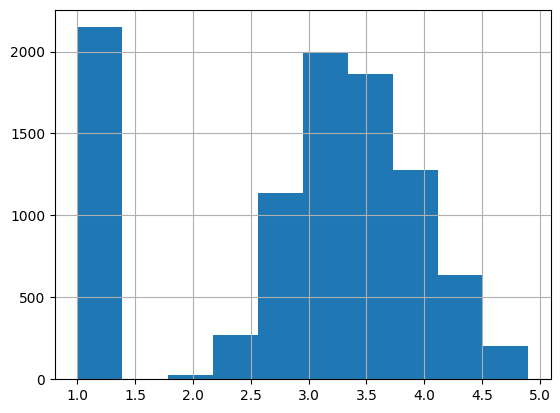

In [8]:
%matplotlib inline
# Creating bar char as the Target Variable is Continuous
ZomatoData['Rating'].hist()

The data distribution of the target variable is satisfactory to proceed further, there are sufficient number of rows for each type of values to learn from.

### **Basic Data Exploration**

Gauging the overall data, volume of data, the type of columns present in the data.

- Initial assessment of the data should be done to identify which columns are Qualitative, Categorical and Quantitative.

- This step helps to reject columns that may affect the target variables and if not then keep them for further analysis.

- Commands useful for basic data exploration:
    - **head()**: Helps to checkout first few rows (5 by default) of the data 
    - **info()**: Provides summarized information of the data
    - **describe()**: Provides descriptive statistical details of the data
    - **nunique()**: Helps to identify if a column is categorical or continuous

In [9]:
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


#### Observing the summarized information of data
- Data types, Missing values based on number of non-null values Vs total rows, etc.
- Remove those variables from data which have too many missing values (Missing values > 30%)
- Removing Qualitative variables that cannot be used in Machine Learning

In [10]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [11]:
# Looking at the descriptive statistics of the data
ZomatoData.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


#### Finding unique values for each column
- To understand which column is categorical and which one is Continuous
- Typically,
    - if the (number of unique values < 20) => Likely to be category otherwise continuous 

In [12]:
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

#### **Basic Data Exploration Results**
Checking for variables that can be removed

- **Restaurant ID:** Qualitative, Rejected
- **Restaurant Name:** Qualitative, Rejected
- **Country Code:** Categorical, Selected
- **City:** Categorical, Rejected as it has too many unique levels, thus can cause high dimensionality
- **Address:** Qualitative, Rejected
- **Locality:** Qualitative, Rejected
- **Locality Verbose:** Qualitative, Rejected
- **Longitude**: Continuous, Selected, Represents the location of Restaurant
- **Latitude**: Continuous, Selected, Represents the location of Restaurant
- **Cuisines**: Qualitative, Rejected, Can be useful
- **Currency**: Categorical, Selected
- **Has Table booking:** Categorical, Selected
- **Has Online delivery:** Categorical, Selected
- **Is delivering now:** Categorical, Selected
- **Switch to order menu:** Categorical, Selected
- **Price range:** Categorical, Selected
- **Votes:** Continuous, Selected
- **Switch to order menu:** Continuous, Selected
- **Average Cost for two:** Continuous, Selected
- **Rating:** Continuous, Selected. **Target Variable**

### **Feature Engineering**

- Some columns cannot be used directly for Machine Learning like Dates, Addresses, etc, as they are qualitative in nature.
- Hence every row has a different string value, ML algorithms cannot learn anything from them because each row has a different description, i.e. no general rules can be created from such columns.
- We can however extract some columns from the columns, which can be used in ML, like from a data column we can take out month, week, quarter, etc, which becomes categorical feature.
- We can extract some repetitive info from address like zip codes, locality, etc, however if the number of unique values is too high in them (more than 50) then it creates trouble later for ML algorithms such as the data dimensionality increases while converting such columns to dummy columns.
- In the data, **Cuisines** cannot be used directly as it'll generate 1825 dummy variables.
    - Thus we count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [13]:
# Functions to count number of cuisines
def cuisine_counter(inpStr):
    NumCuisies=len(str(inpStr).split(','))
    return NumCuisies

In [14]:
# Creating a new feature in data
ZomatoData['CuisineCount']=ZomatoData['Cuisines'].apply(cuisine_counter)
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


In [15]:
ZomatoData.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating', 'CuisineCount'],
      dtype='object')

### **Removing useless columns from the data**


In [16]:
# Deleting those columns which are not useful in Predictive analysis because these variables are qualitative

uselessColumns=['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines']

ZomatoData=ZomatoData.drop(uselessColumns, axis=1)
ZomatoData.head()

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,CuisineCount
0,162,121.027535,14.565443,Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,162,121.014101,14.553708,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,162,121.056831,14.581404,Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,162,121.056475,14.585318,Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,162,121.057508,14.584450,Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


### Visual Exploratory Data Analysis
- Categorical Variables: Bar plot
- Continuous Variables: Histogram

In [17]:
ZomatoData.columns

Index(['Country Code', 'Longitude', 'Latitude', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Votes', 'Average Cost for two',
       'Rating', 'CuisineCount'],
      dtype='object')

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

- We can spot a categorical variable in the data by looking at the unique values in them.
- Typically, categorical variables contains < 20 unique values AND there can be repetition of values, i.e. data can be grouped by those unique values.


**Categorical Predictors:** 'Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range'

Using Bar Charts to see how the data is distributed for the categorical columns

- Plotting multiple bar charts at once for categorical variables
- Since there is no default function which can plot bar charts for multiple columns at once, making a function called **PlotBarCharts**

In [18]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    plt.suptitle('Bar Charts of: ' + str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

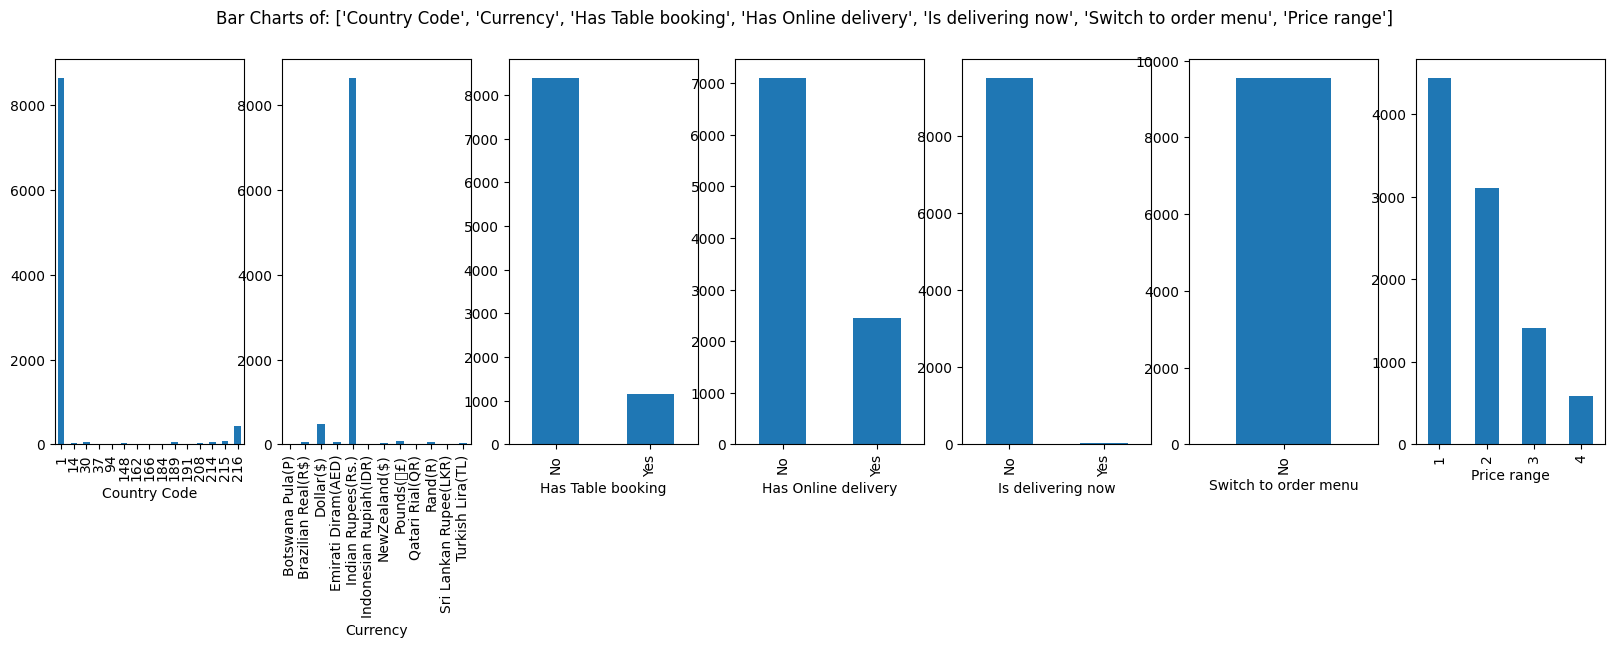

In [19]:
# Using the function
PlotBarCharts(inpData=ZomatoData, colsToPlot=['Country Code', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range'])

### **Bar Charts Interpretation**

- Bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
- In Ideal bar chart, each category has comparable frequency.
- **Columns**: 'Country Code', 'Currency Code', 'Is delivering now', 'Price Range' are too skewed.

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms

There are four continuous predictor variables, 'Longitude', 'Latitude', 'Votes' and 'Average Cost for two'

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

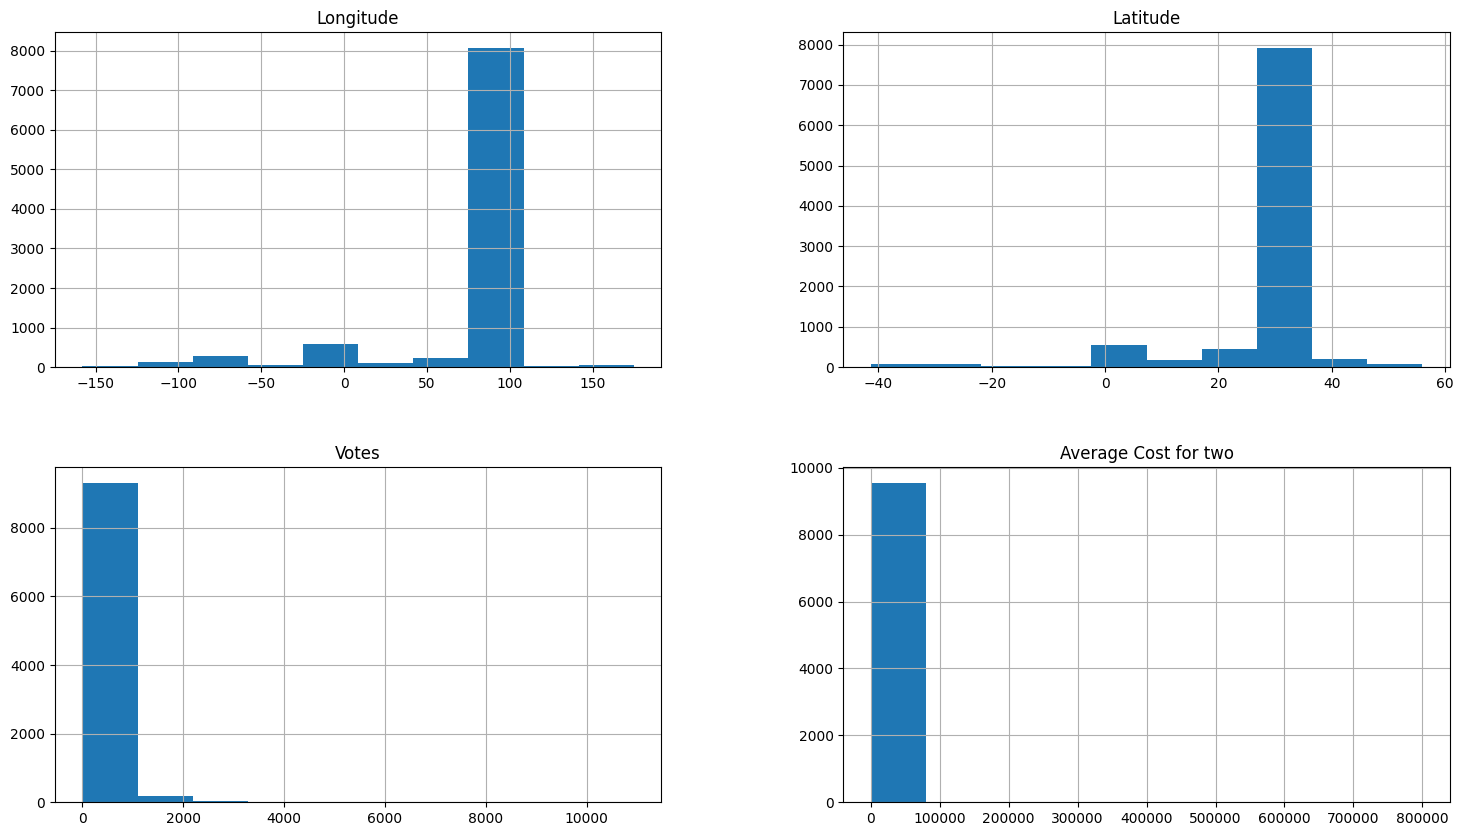

In [20]:
# Plotting the histograms of multiple columns together
ZomatoData.hist(['Longitude', 'Latitude', 'Votes', 'Average Cost for two'], figsize=(18, 10))

#### **Histogram Interpretation**

- Histograms shows the data distribution for a single continuous variable.
- The,
    - X-axis -> shows the range of values
    - Y-axis -> number of values in that range
- Selected Continuous Variables:
    - **Longitude**: Selected, The distribution is good
    - **Latitude**: Selected, The distribution is good
    - **Votes**: Selected, Outliers seen beyond 300000, **needs treatment**
    - **Average Cost for two**: Selected, outliers seen beyond 4000, need to treat them.

### **Outlier Treatment**

- Outliers are extreme values in the data which are far away from most of the values, can be seen as the tails in the histogram.

- Outliers must be treated one column at a time, as the treatment will be slightly different from each column.

**Why to treat outliers?**

- Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

**Options to treat outliers in the data:**
- Option 1: Delete the outlier records, only if there are just few rows lost.
- Option 2: Impute the outlier values with a logical business value

#### **Replacing outliers for 'Votes'**

In [21]:
# Finding nearest values to 4000 mark
ZomatoData['Votes'][ZomatoData['Votes'] < 4000].sort_values(ascending=False)

7863    3986
821     3848
3992    3697
3119    3591
1861    3569
        ... 
4801       0
4803       0
4805       0
4807       0
4784       0
Name: Votes, Length: 9532, dtype: int64

Above results shows the nearest logical value is 3986, hence replacing all above 4000 with it

In [22]:
# Replacing outliers with nerest possible values
ZomatoData['Votes'][ZomatoData['Votes'] > 4000] = 3896

#### **Replacing outliers for 'Average Cost for two'**

In [23]:
# Finding nearest values to 50000 mark
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two'] < 50000].sort_values(ascending=False)

7543    8000
4088    7000
4087    6500
7494    6000
7538    6000
        ... 
85         0
87         0
240        0
397        0
9242       0
Name: Average Cost for two, Length: 9530, dtype: int64

We get that the nearest logical value is 8000, hence, replacing any value above 50000 with it.

In [24]:
# Replacing outliers with nearest possible values
ZomatoData['Average Cost for two'][ZomatoData['Average Cost for two'] > 50000] = 8000

#### **Visualizing distribution after outlier treatment**
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable

array([[<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

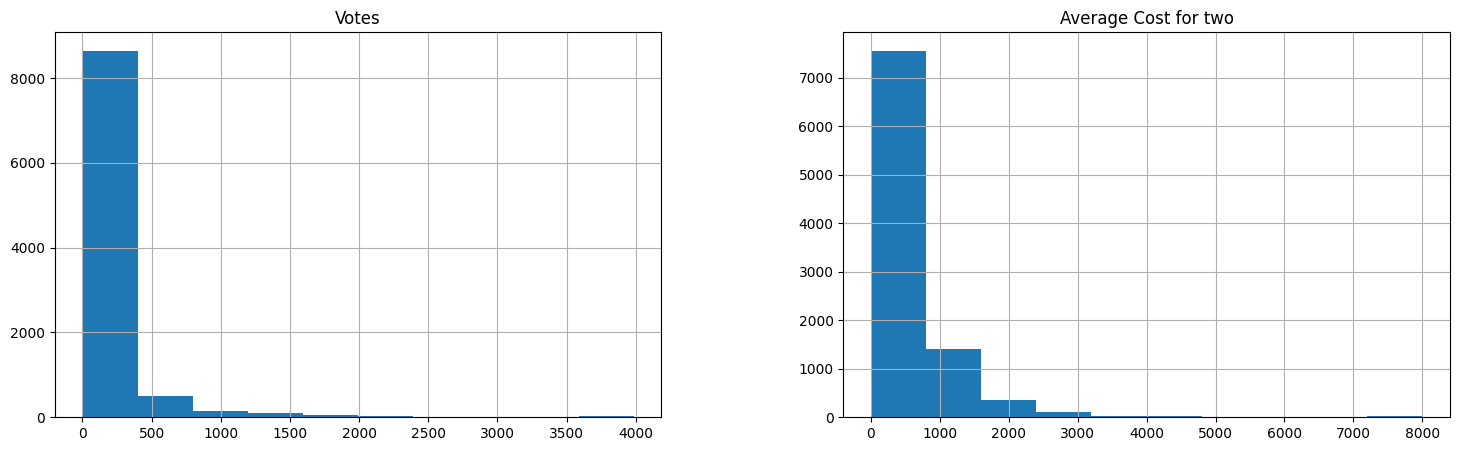

In [25]:
ZomatoData.hist(['Votes', 'Average Cost for two'], figsize=(18,5))

### **Missing values treatment**

Missing values are treated for each column separately.

If a column has > 30% data missing, then missing value treatment cannot be done, the column must be rejected because too much information is missing.

There are below options for treating missing values in data.
- Delete the missing values rows if there are only few records.
- Impute the missing values with MEDIAN value for continuous variables.
- Impute the missing values with MODE value for categorical variables.
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [26]:
# Finding how many missing values are there for each column
ZomatoData.isnull().sum()

Country Code            0
Longitude               0
Latitude                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
CuisineCount            0
dtype: int64

#### **Feature Selection**

- Choosing the best columns (Feature) which are correlated to the Target variable.
- Can be done by measuring the correlation values or ANOVA/Chi-Square tests.
- However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.
- Visualizing relationships between two variables as well as measuring the strength statistically.

**Visual exploration of relationship between variables**
- Continuous Vs Continuous -> Scatter Plot
- Categorical Vs Continuous -> Box Plot
- Categorical Vs Categorical -> Grouped Bar Plots

**Statistical measurement of relationship strength between variables**
- Continuous Vs Continious -> Correlation matrix
- Categorical Vs Continuous -> ANOVA test
- Categorical Vs Categorical -> Chi-Square test

In this case the Target variable is Continuous, hence below two scenarios will be present.
- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predictor

### **Relationship exploration: Continuous Vs Continuous -> Scatter Charts**

When the Target variable is continuous and the predictor is also continuous, we use Scatter plot for those two variables and measure the relationship of relation using pearson's correlation value.

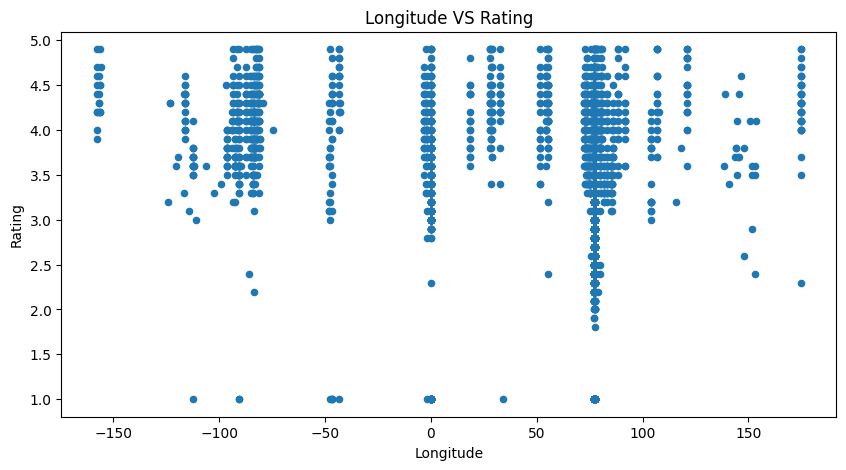

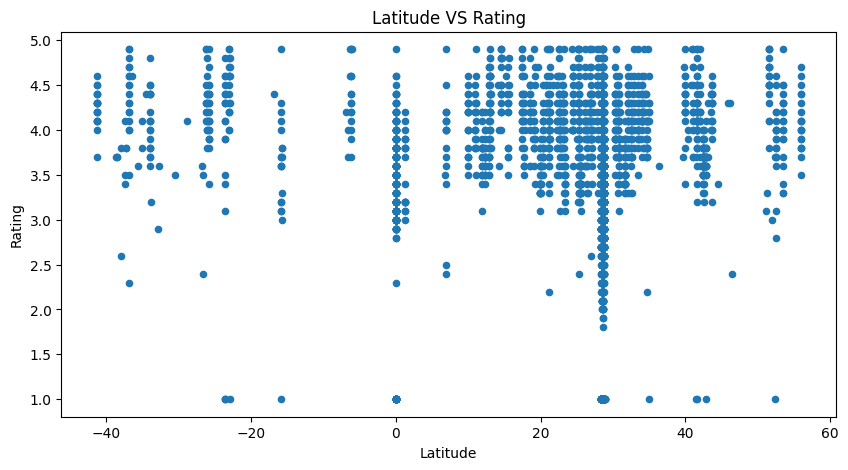

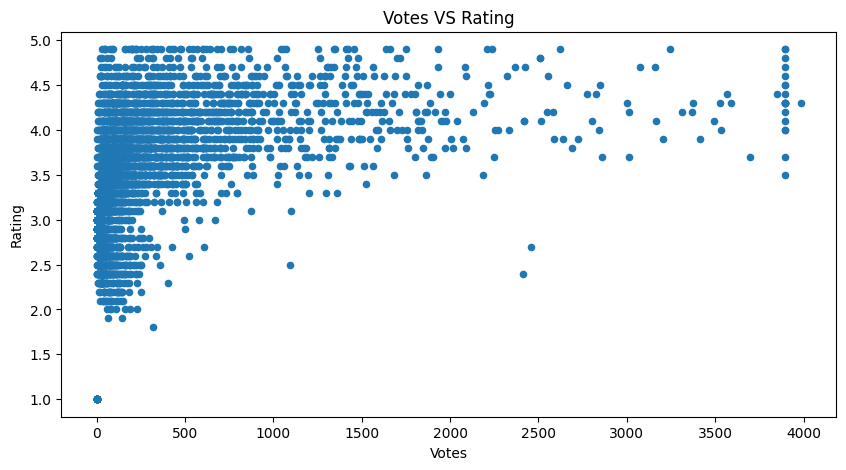

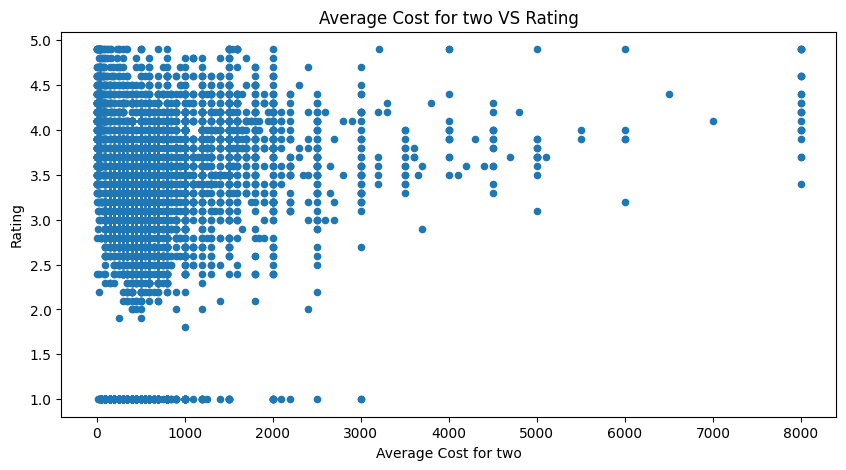

In [27]:
ContinuousCols=['Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# PLotting the scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    ZomatoData.plot.scatter(x=predictor, y='Rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')

### **Scatter Charts Interpretation**

Trends to look for in Scatter Charts:

1. Increasing Trend: Indicates that both the variables are positively correlated, i.e. they are directly proportional to each other.
2. Decrearsing Trend: Indicates that both the variables are negatively correlated, i.e. they are inversely proportional to each other.
3. No Trend: Neither increasing nor decreasing trend. This means there is no correlation between the variables.
    - Hence, the predictors cannot be used for ML.

### **Statistical Feature Selection (Continuous Vs Continuous) using Correlation value**

**Pearson's correlation coefficient** can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviation (denominator)

<html><image src="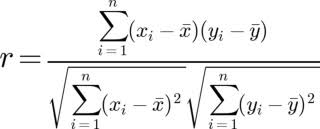"></html>

- Can be calculated only between two numeric columns
- **Correlation between [-1,0)** means inversely proportional, the scatter plot will show a downward trend
- **Correlation between (0,1]** means directly proportional, the scatter plot will show an upward trend
- **Correlation near {0}** mean No relationship, the scatter plot will show no clear trend.
- **Correlation value > 0.5** between two variables, indicates good relationship, **the sign does not matter**
- We observe the correlation between Target variable and all other predictor variable(s) to check which columns/features/predictors are actually related to target variable in question

In [28]:
# Calculating correlation matrix
ContinuousCols=['Rating', 'Longitude', 'Latitude', 'Votes', 'Average Cost for two']

# Creating the correlation matrix
CorrelationData=ZomatoData[ContinuousCols].corr()
CorrelationData

,Rating,Longitude,Latitude,Votes,Average Cost for two
Rating,1.000000,-0.145930,-0.019806,0.386505,0.248981
Longitude,-0.145930,1.000000,0.043207,-0.102050,0.210272
Latitude,-0.019806,0.043207,1.000000,-0.019620,-0.064748
Votes,0.386505,-0.102050,-0.019620,1.000000,0.246367
Average Cost for two,0.248981,0.210272,-0.064748,0.246367,1.000000


In [29]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.2]

Rating                  1.000000
Votes                   0.386505
Average Cost for two    0.248981
Name: Rating, dtype: float64

Final selected Continuous columns:
'Votes', 'Average Cost for two'

### **Relationship exploration: Categorical Vs Continuous -> Box Plots**

When the target variable -> Continuous and the predictor variable -> Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test.

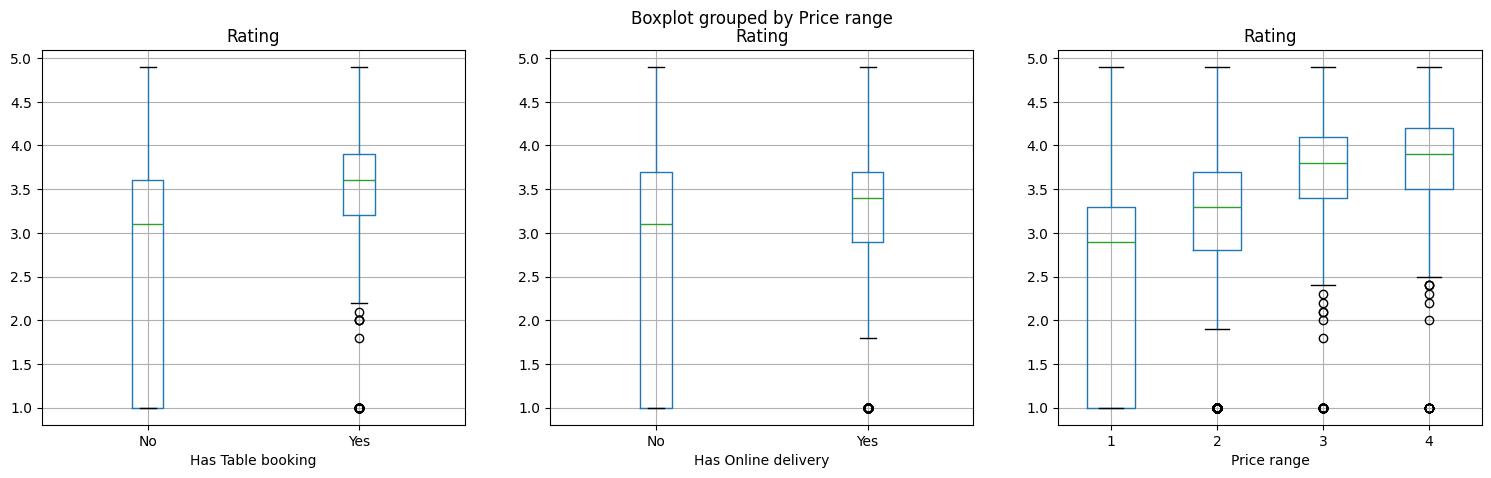

In [30]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors

CategoricalColsList=['Has Table booking', 'Has Online delivery', 'Price range']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each categorical predictors against the Target Variable ""1. ZomatoRestaurantRating.ipynb"
for PredictorCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    ZomatoData.boxplot(column='Rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### **Box-Plots interpretation**
**What does box plots tell us:**

- These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

- If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

- On the other hand if the distribution is different for each category(the boxes are not in same line). It hints that these variables might be correlated with Rating.

- In this data, all three categorical predictors looks correlated with the Target variable.

### **Statistical Feature Selection (Categorical Vs Continuous) using ANOVA Test**

Analysis of Variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.

- Assumption H0: There is NO relation between the given variables i.e.,
    - The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable.
- ANOVA Test result: Probability of H0 being true.

In [31]:
# Defining the function to find the statistical relationship between all the categorical variables

def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')

    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults=f_oneway(*CategoryGroupLists)

        # If the ANOVA P-value < 0.05, thus reject H0

        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
    
    return (SelectedPredictors)

In [32]:
# Calling the function to check which categorical variables are correlated with target

CategoricalPredictorList=['Has Table booking', 'Has Online delivery', 'Price range']
FunctionAnova(inpData=ZomatoData, 
              TargetVariable='Rating', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Has Table booking is correlated with Rating | P-Value: 3.9393041304297214e-82
Has Online delivery is correlated with Rating | P-Value: 1.695258742057596e-92
Price range is correlated with Rating | P-Value: 0.0


['Has Table booking', 'Has Online delivery', 'Price range']

The results of ANOVA confirms out visual analysis using box plots above.

- All categorical variables are correlated with the Target Variable.

**Final selected Categorical columns**:

'Has Table booking', 'Has Online delivery', 'Price range'

### **Selecting final predictors for Machine Learning**

In [33]:
SelectedColumns=['Votes','Average Cost for two','Has Table booking',
                 'Has Online delivery','Price range']

# Selecting final columns
DataForML=ZomatoData[SelectedColumns]
DataForML.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,314,1100,Yes,No,3
1,591,1200,Yes,No,3
2,270,4000,Yes,No,4
3,365,1500,No,No,4
4,229,1500,Yes,No,4


In [34]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### **Data Pre-processing for Machine Learning**

List of steps performed on predictor variables before data can be used for machine learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

### **Converting the binary nominal variable to numeric using 1/0 mapping**

In [35]:
# Converting the binary nominal variable to a numerical variable
DataForML['Has Table booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has Online delivery'].replace({'Yes':1, 'No':0}, inplace=True)

### **Converting the nominal variable to numeric using get_dummies()**

In [36]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding target variable to the data
DataForML_Numeric['Rating']=ZomatoData['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating
0,314,1100,1,0,3,4.8
1,591,1200,1,0,3,4.5
2,270,4000,1,0,4,4.4
3,365,1500,0,0,4,4.9
4,229,1500,1,0,4,4.8


### Splitting the data into Training and Testing sample

- Training data: 70%
- Testing data: 30%

In [37]:
DataForML_Numeric.columns

Index(['Votes', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Rating'],
      dtype='object')

In [38]:
# Separating Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standardization/ Normalization of data

In [39]:
### Standardization of the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For StandardScaler -> PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X = PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6685, 5)
(6685,)
(2866, 5)
(2866,)


### Multiple Linear Regression

In [ ]:
# Multiple LInear Regression
from sklearn.linear_model import LinearRegression
RegModel=LinearRegression()

# Printing all the parameters of Linear Regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train, y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale
from sklearn import metrics
# Measuring goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, LREG.predict(X_train)))
      
print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100*((abs(TestingDataResults['Rating']-TestingDataResults['PredictedRating']))/TestingDataResults['Rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100-MAPE


LinearRegression()
R2 Value: 0.30694065626546474

##### Model Validation and Accuracy Calculations ######
   Rating  PredictedRating
0     2.1              2.0
1     4.1              3.0
2     3.2              3.0
3     4.4              3.0
4     3.5              2.0
